In [46]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pathlib
import os

In [47]:
def parapara(num):
    # インスペクターから得た位置とオイラー角を読み込む
    folder_path = pathlib.Path("cam_pos_rot")
    file_path = os.path.join(folder_path, str(num)+".csv")
    pos_rot = np.loadtxt(file_path,delimiter=",")
    t = pos_rot[0,:]
    angles = pos_rot[1,:]
    angles = np.array([angles[0],angles[1],angles[2]])
    return t, angles

In [48]:
def rotation(R_mat, t_vec):
    world_loc = np.array([0, 0, 0])
    world_ax = np.array([[1, 0, 0],
                          [0, 1, 0],
                          [0, 0, 1]])
    
    loc = world_loc + t_vec
    ax_mat = np.dot(R_mat, world_ax)
    x_vec, y_vec, z_vec = ax_mat[0,0:3], ax_mat[1,0:3], ax_mat[2,0:3]
    
    return loc, x_vec, y_vec, z_vec

In [49]:
def roted_ax(loc, x_vec, y_vec, z_vec):

    # x軸
    #ax.quiver(loc[0], loc[1], loc[2],
    #            x_vec[0], x_vec[1], x_vec[2],
    #            color = "red", length = 1, arrow_length_ratio = 0.2)

    # y軸
    #ax.quiver(loc[0], loc[1], loc[2],
    #            y_vec[0], y_vec[1], y_vec[2],
    #            color = "green", length = 1, arrow_length_ratio = 0.2)
    # z軸
    ax.quiver(loc[0], loc[1], loc[2],
                z_vec[0], z_vec[1], z_vec[2],
                color = "blue", length = 1, arrow_length_ratio = 0.2)

In [50]:
def Rx(angle):
    return np.array([[1, 0, 0],
                    [0, np.cos(np.radians(angle)), np.sin(np.radians(angle))],
                    [0, -np.sin(np.radians(angle)), np.cos(np.radians(angle))]])

def Ry(angle):
    return np.array([[np.cos(np.radians(angle)), 0, -np.sin(np.radians(angle))],
                    [0, 1, 0],
                    [np.sin(np.radians(angle)), 0, np.cos(np.radians(angle))]])

def Rz(angle):
    return np.array([[np.cos(np.radians(angle)), np.sin(np.radians(angle)), 0],
                    [-np.sin(np.radians(angle)), np.cos(np.radians(angle)), 0],
                    [0, 0, 1]])

def R_mat(angles):
    return np.dot(Rx(angles[0]),Ry(angles[1]))

<IPython.core.display.Javascript object>


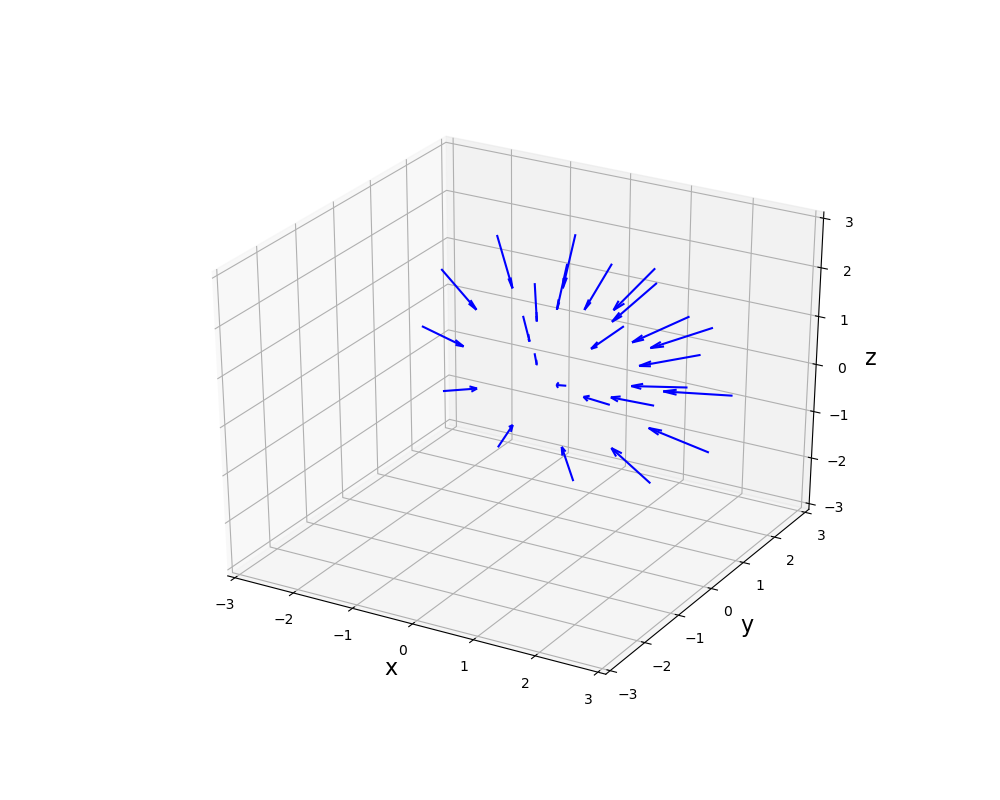

In [51]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection='3d')
    # 軸ラベルの設定
ax.set_xlabel("x", fontsize = 16)
ax.set_ylabel("y", fontsize = 16)
ax.set_zlabel("z", fontsize = 16)

# 軸範囲の設定
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)

# 格子点の作成
x = np.arange(-3, 3, 0.2)
y = np.arange(-3, 3, 0.2)
xx, yy = np.meshgrid(x, y)



for i in range(25):
    t, angles = parapara(i)
    R = R_mat(angles)
    loc, x_vec, y_vec, z_vec = rotation(R, t)
    roted_ax(loc, x_vec, y_vec, z_vec)
    ex_para = np.concatenate([R, np.reshape(t,(3,1))], 1)
    np.savetxt('view_mat/'+str(i)+'.csv', ex_para, delimiter=',', fmt='%f')
plt.show()

In [52]:
def para_load(num):
    #インスペクターから得た値で計算した後のパラメータを読み込む
    folder_path = pathlib.Path("view_mat")
    file_path = os.path.join(folder_path, str(num)+".csv")
    Rt = np.loadtxt(file_path, delimiter=",")
    
    R = Rt[0:3, 0:3]
    t = Rt[0:3, 3]
    return R, t

<IPython.core.display.Javascript object>


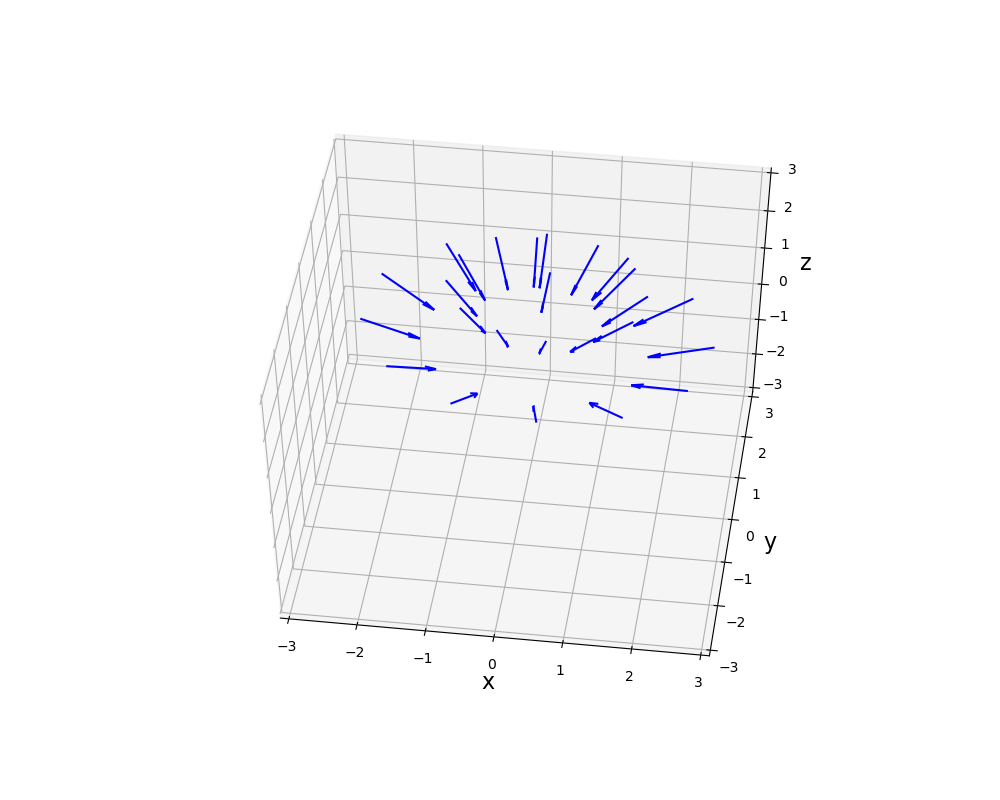

In [53]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection='3d')
    # 軸ラベルの設定
ax.set_xlabel("x", fontsize = 16)
ax.set_ylabel("y", fontsize = 16)
ax.set_zlabel("z", fontsize = 16)

# 軸範囲の設定
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)

# 格子点の作成
x = np.arange(-3, 3, 0.2)
y = np.arange(-3, 3, 0.2)
xx, yy = np.meshgrid(x, y)



for i in range(25):
    R, t = para_load(i)
    loc, x_vec, y_vec, z_vec = rotation(R, t)
    roted_ax(loc, x_vec, y_vec, z_vec)
plt.show()

In [54]:
def para_load2(num):
    #インスペクターから得た値で計算した後のパラメータを読み込む
    folder_path = pathlib.Path("view_mat")
    file_path = os.path.join(folder_path, str(num)+".csv")
    Rt = np.loadtxt(file_path, delimiter=",")
    return Rt


def F_mat(Rt1, Rt2):
    
    R1 = Rt1[0:3, 0:3]
    R2 = Rt2[0:3, 0:3]
    t1 = Rt1[0:3,3]
    t2 = Rt2[0:3,3]
    #print(R1, R2, t1, t2)
    R = np.dot(R2, np.linalg.inv(R1))
    t = t2-t1
    #T = T_mat(t)
    #F = np.dot(np.dot(np.dot(np.linalg.inv(A1.T), T), R), np.linalg.inv(A2))
    
    return R, t

In [65]:
Rt0 = para_load2(0)
Rt2 = para_load2(4)

In [66]:
R0to2, t0to2 = F_mat(Rt0,Rt2)

In [67]:
print(R0to2, t0to2)

[[-0.49999964 -0.70457885 -0.50355541]
 [ 0.31103361  0.39656282 -0.86371088]
 [ 0.80824445 -0.58847709  0.02086642]] [ 0.55 -1.1  -3.55]


<IPython.core.display.Javascript object>


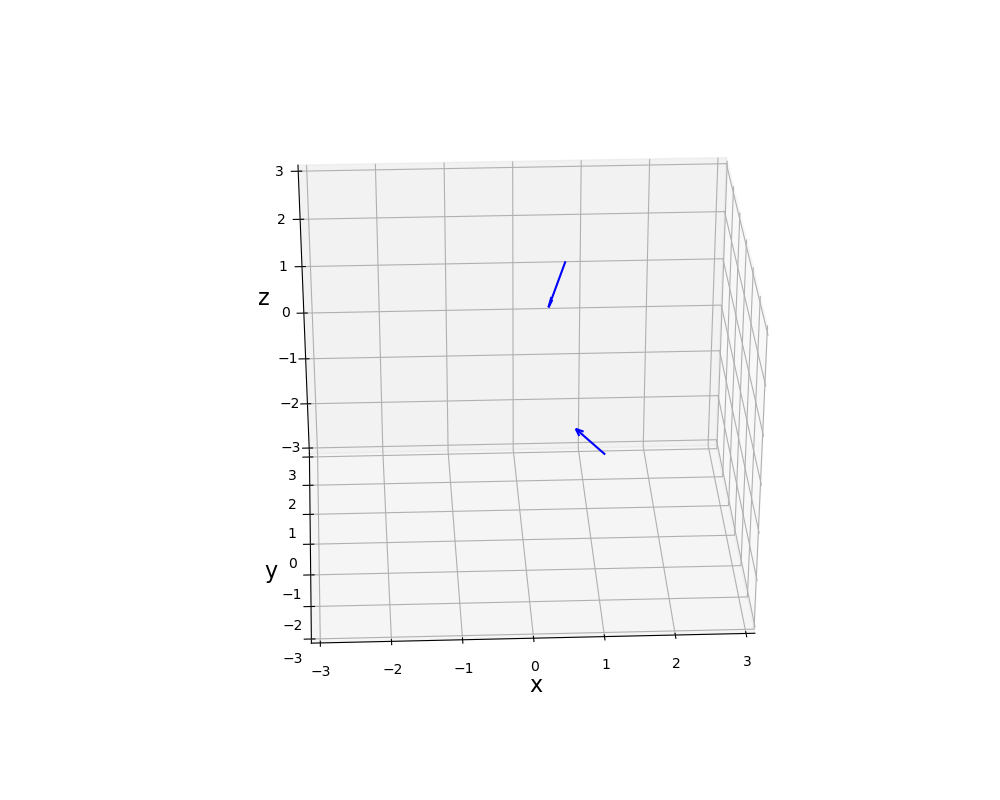

In [68]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection='3d')
    # 軸ラベルの設定
ax.set_xlabel("x", fontsize = 16)
ax.set_ylabel("y", fontsize = 16)
ax.set_zlabel("z", fontsize = 16)

# 軸範囲の設定
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)

# 格子点の作成
x = np.arange(-3, 3, 0.2)
y = np.arange(-3, 3, 0.2)
xx, yy = np.meshgrid(x, y)

R, t = para_load(0)
loc, x_vec, y_vec, z_vec = rotation(R, t)
roted_ax(loc, x_vec, y_vec, z_vec)

loc = t + t0to2
rot_mat = np.dot(R0to2, np.stack([x_vec, y_vec, z_vec]))
x_vec, y_vec, z_vec = rot_mat[0, 0:3], rot_mat[1, 0:3], rot_mat[2, 0:3]
roted_ax(loc, x_vec, y_vec, z_vec)

plt.show()

<IPython.core.display.Javascript object>


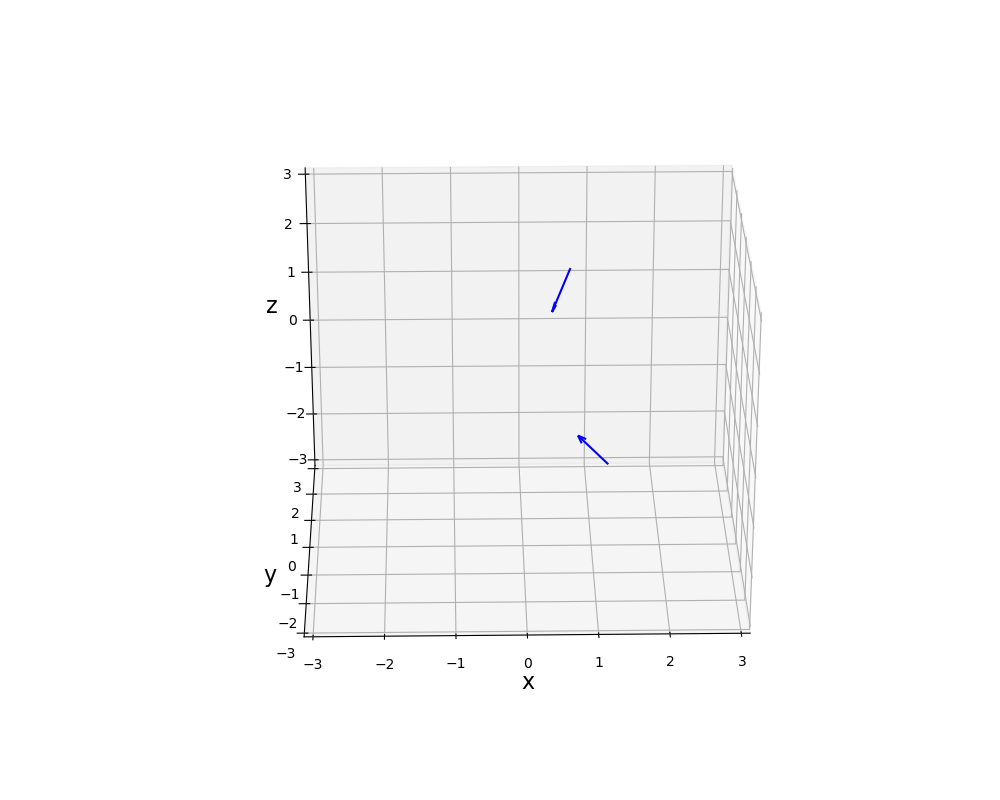

In [70]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection='3d')
    # 軸ラベルの設定
ax.set_xlabel("x", fontsize = 16)
ax.set_ylabel("y", fontsize = 16)
ax.set_zlabel("z", fontsize = 16)

# 軸範囲の設定
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)

# 格子点の作成
x = np.arange(-3, 3, 0.2)
y = np.arange(-3, 3, 0.2)
xx, yy = np.meshgrid(x, y)

R, t = para_load(0)
loc, x_vec, y_vec, z_vec = rotation(R, t)
roted_ax(loc, x_vec, y_vec, z_vec)

R, t = para_load(4)
loc, x_vec, y_vec, z_vec = rotation(R, t)
roted_ax(loc, x_vec, y_vec, z_vec)
plt.show()